CLIPseg
===

### Image Segmentation Using Text and Image Prompts
 * Paper: https://arxiv.org/abs/2112.10003

![CLIPseg](../assets/clipseg-architecture.png)

```bash
pip install torch torchvision
pip install transformers
pip install matplotlib
```

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

device = "cuda" if torch.cuda.is_available() else "cpu"
processor = CLIPSegProcessor.from_pretrained(
    "CIDAS/clipseg-rd64-refined"
)
model = CLIPSegForImageSegmentation.from_pretrained(
    "CIDAS/clipseg-rd64-refined"
).to(device)
model.eval();

/home/pyml/anaconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def inference(image, prompts, device="cpu"):
    inputs = processor(
        text=prompts, images=[image] * len(prompts),
        padding="max_length", return_tensors="pt"
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
    preds = outputs.logits.unsqueeze(1)

    return preds

/home/pyml/anaconda3/envs/py311/lib/python3.11/site-packages/transformers/image_processing_utils.py:42: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


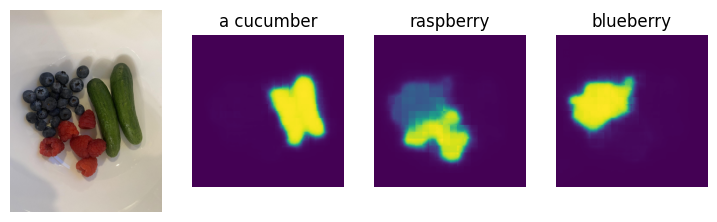

In [3]:
image = Image.open("../samples/fruits-01.jpg")
prompts = ["a cucumber", "raspberry", "blueberry"]
n = len(prompts)

# inference
preds = inference(image, prompts, device)

# visualize prediction
fig, axes = plt.subplots(1, n + 1, figsize=(n*3, 4))
axes[0].imshow(image)
axes[0].axis('off')
for i in range(len(prompts)):
    axes[i + 1].imshow(torch.sigmoid(preds[i][0]).cpu())
    axes[i + 1].set_title(prompts[i])
    axes[i + 1].axis('off')
plt.show()

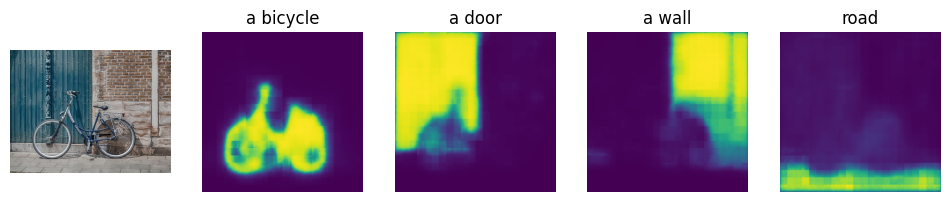

In [4]:
image = Image.open("../samples/bicycle.jpg")
prompts = ["a bicycle", "a door", "a wall", "road"]
n = len(prompts)

# inference
preds = inference(image, prompts, device)

# visualize prediction
fig, axes = plt.subplots(1, n + 1, figsize=(n*3, 4))
axes[0].imshow(image)
axes[0].axis('off')
for i in range(len(prompts)):
    axes[i + 1].imshow(torch.sigmoid(preds[i][0]).cpu())
    axes[i + 1].set_title(prompts[i])
    axes[i + 1].axis('off')
plt.show()